In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.init as init
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchinfo import summary
import seaborn as sns
import matplotlib.pyplot as plt
from ptflops import get_model_complexity_info
import os
from utils import *
from custom_layer import *
from base_model import *
import json

In [2]:
torch.set_num_threads(6)
# torch.set_num_interop_threads(1)
torch.backends.mkldnn.enabled = True

In [3]:
state = json.load(open('../../../dataset/DogVsCatDataset/preprocessed/final_split1/dataset_splits.json', 'r'))

criterion = torch.nn.CrossEntropyLoss()
train_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["train80"], batch_size=40)
test_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["test20"], batch_size=40)

In [4]:
model6_0 = Model0(
    norm=nn.BatchNorm2d(10),
    pool=lambda x : HybridPoolingV0(x),
    post_conv=post_conv0,
    ratio=3
)
he_initialization(model6_0)
describe(model6_0)

MACs: 35.3 MMac, Params: 12.48 k
Layer (type:depth-idx)                   Output Shape              Param #
Model0                                   [1, 2]                    --
├─BatchNorm2d: 1-1                       [1, 10, 128, 128]         20
├─Sequential: 1-2                        [1, 10, 64, 64]           --
│    └─Conv2d: 2-1                       [1, 20, 128, 128]         1,000
│    └─Sequential: 2-2                   [1, 20, 128, 128]         --
│    │    └─BatchNorm2d: 3-1             [1, 20, 128, 128]         40
│    │    └─PReLU: 3-2                   [1, 20, 128, 128]         1
│    └─HybridPoolingV0: 2-3              [1, 20, 64, 64]           --
│    │    └─MaxPool2d: 3-3               [1, 20, 64, 64]           --
│    │    └─AvgPool2d: 3-4               [1, 20, 64, 64]           --
│    │    └─Sequential: 3-5              [1, 20, 64, 64]           40
│    └─Conv2d: 2-4                       [1, 10, 64, 64]           990
│    └─Sequential: 2-5                   [1, 10, 

Loading checkpoint from model_weights/model6_0.pt
Starting
Epoch 1/10: Train loss = 0.4784, Train accuracy = 0.7719, Test loss = 0.4884, Test accuracy = 0.7628


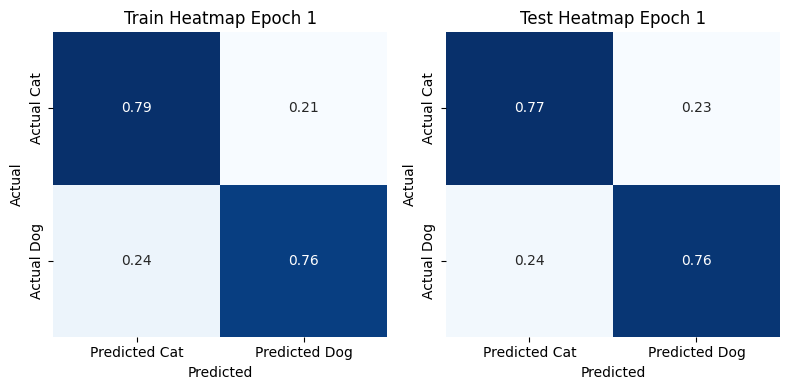

Epoch 2/10: Train loss = 0.4307, Train accuracy = 0.7966, Test loss = 0.4388, Test accuracy = 0.7881


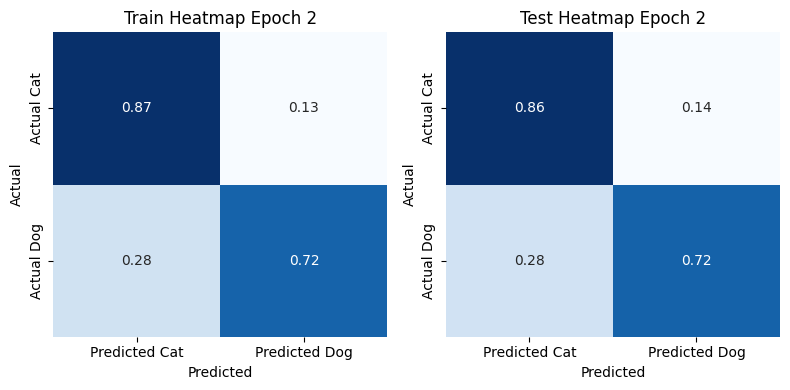

Epoch 3/10: Train loss = 0.4017, Train accuracy = 0.8175, Test loss = 0.4251, Test accuracy = 0.8013


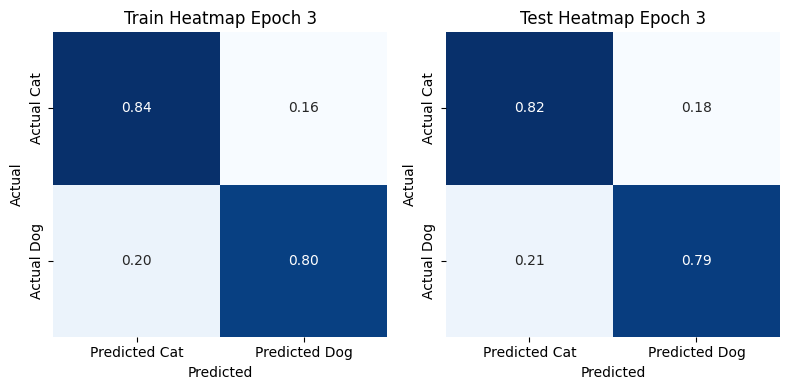

Epoch 4/10: Train loss = 0.3886, Train accuracy = 0.8249, Test loss = 0.3987, Test accuracy = 0.8136


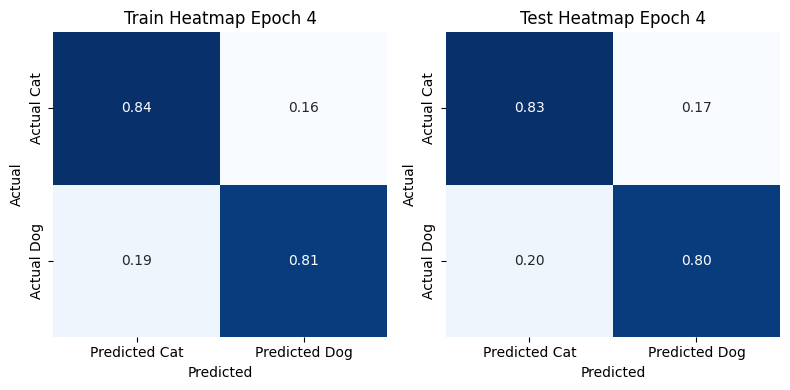

Epoch 5/10: Train loss = 0.3633, Train accuracy = 0.8381, Test loss = 0.3834, Test accuracy = 0.8292


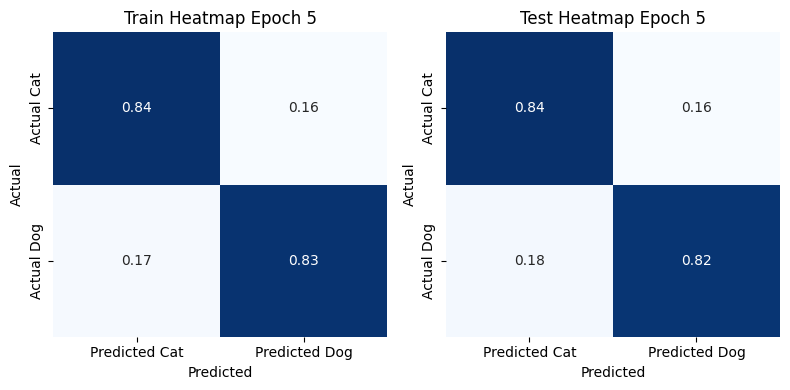

Epoch 6/10: Train loss = 0.3446, Train accuracy = 0.8456, Test loss = 0.3646, Test accuracy = 0.8315


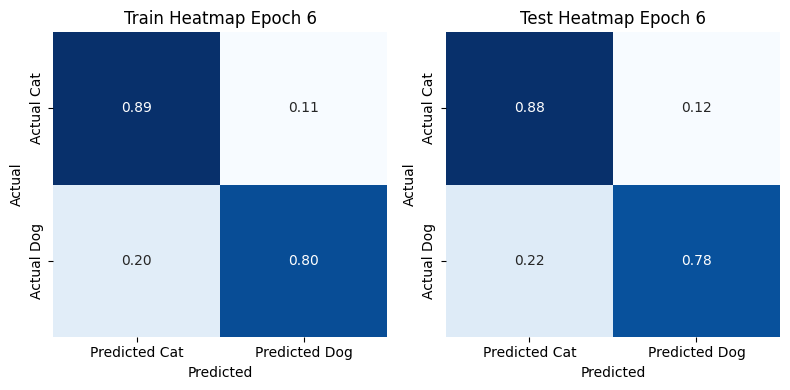

Epoch 7/10: Train loss = 0.3172, Train accuracy = 0.8642, Test loss = 0.3525, Test accuracy = 0.8458


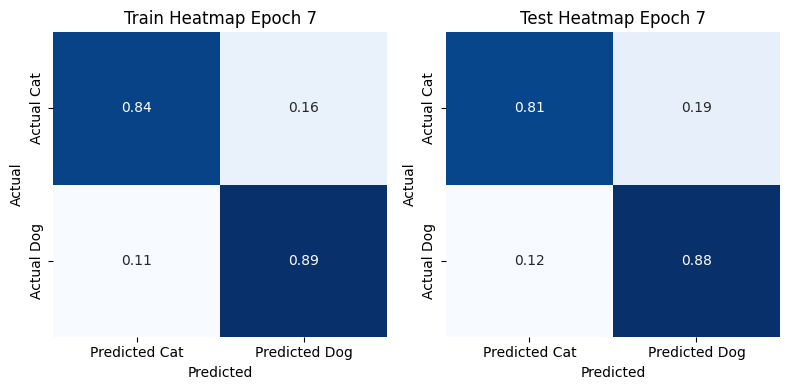

Epoch 8/10: Train loss = 0.2912, Train accuracy = 0.8750, Test loss = 0.3262, Test accuracy = 0.8561


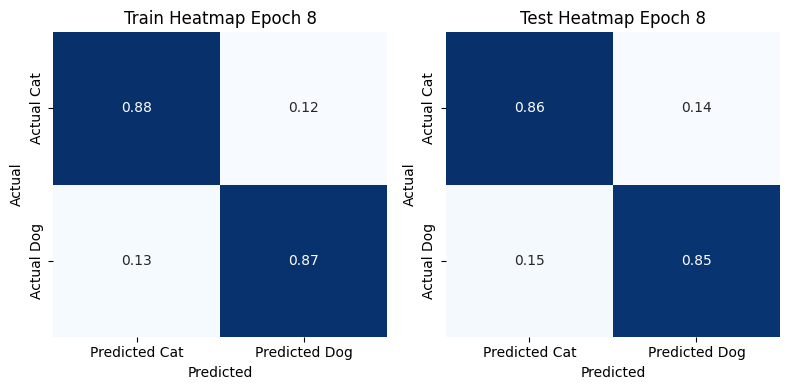

Epoch 9/10: Train loss = 0.2900, Train accuracy = 0.8764, Test loss = 0.3285, Test accuracy = 0.8571


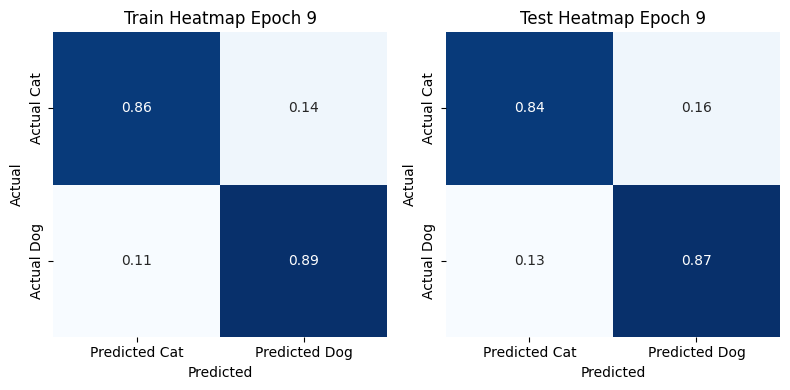

Epoch 10/10: Train loss = 0.2864, Train accuracy = 0.8768, Test loss = 0.3294, Test accuracy = 0.8543


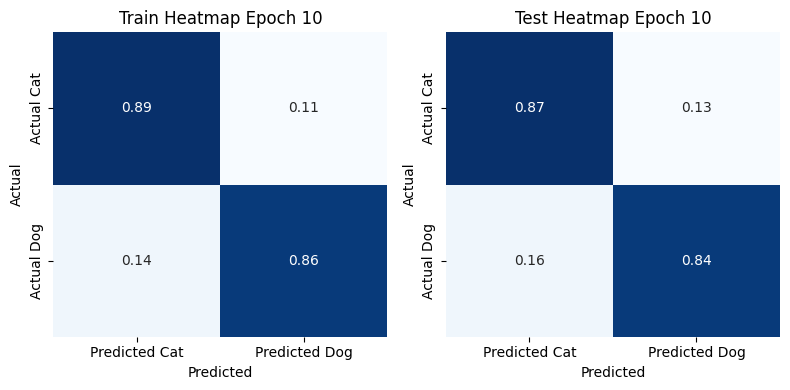

Training complete.


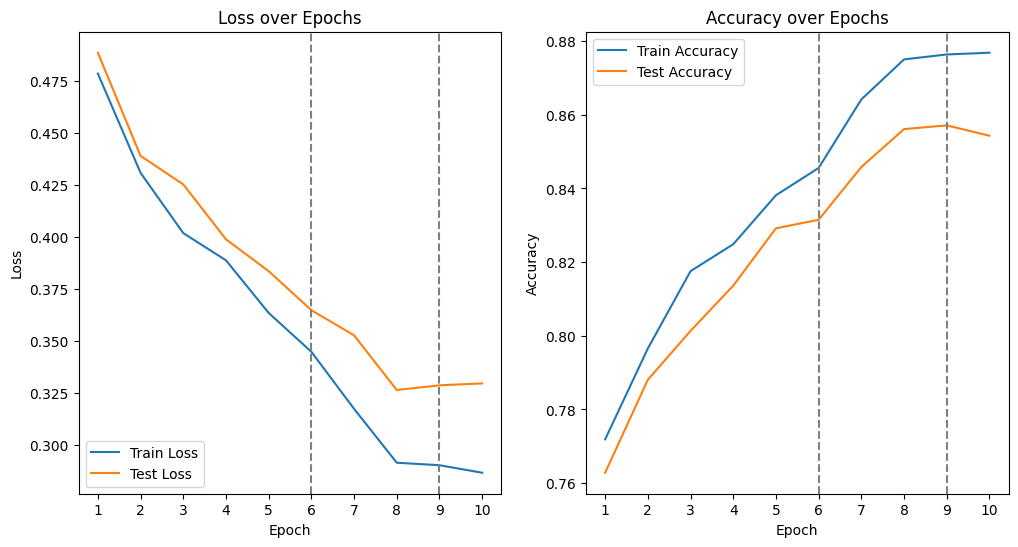

In [5]:
train(model6_0,"model_weights/model6_0.pt",criterion,train_dataset,test_dataset)